In [26]:
import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [478]:
n = 128
p = 1 - tfp.distributions.Gamma(1, 1000).sample((n)).numpy()
q = 1 - p

In [479]:
klf = 60000/n

In [480]:
q.sum()

0.11266947

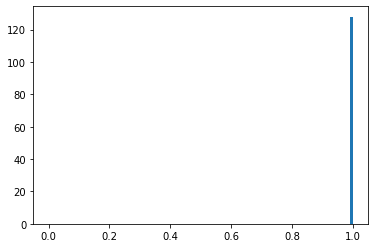

In [481]:
plt.hist(p.flatten(), 100, [0, 1])
plt.show()

In [482]:
a = 1e-6
b = 1e-6

ap = 126
bp = 2
N = 1
q = 1-p

likelihood = tfp.distributions.BetaBinomial(N, a, b)
post_likelihood = tfp.distributions.BetaBinomial(N, a + p.sum(), b + n*N - p.sum())

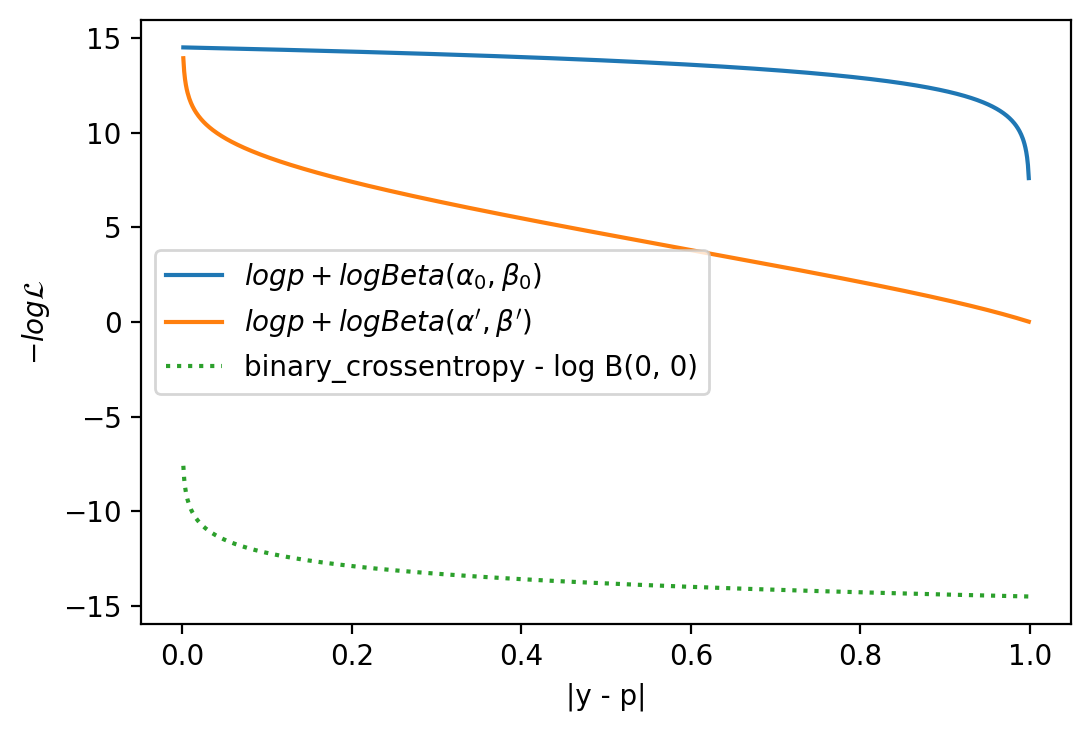

In [483]:
nn = 1000
domain = np.linspace(1e-3, 1-(1e-3), nn)

bce = np.zeros(nn)
for i in range(nn):
    bce[i] = tf.keras.metrics.binary_crossentropy([1.], [domain[i]]).numpy()
    
plt.figure(dpi=200)
plt.plot(domain, -np.log(domain) - likelihood.log_prob(domain).numpy(), 
         label=r'$log p + log Beta(\alpha_0, \beta_0)$')
plt.plot(domain, -np.log(domain) - post_likelihood.log_prob(domain).numpy(), 
         label=r'$log p + log Beta(\alpha^\prime , \beta^\prime)$')

plt.plot(domain, bce - tf.math.lbeta([a, b]), ':', label='binary_crossentropy - log B(0, 0)')
plt.legend()

plt.xlabel('|y - p|')
plt.ylabel(r'$-log \mathcal{L}$')
plt.show()

In [484]:
post_likelihood.parameters

{'total_count': 1,
 'concentration1': 127.8873301015625,
 'concentration0': 0.11267189843749748,
 'validate_args': False,
 'allow_nan_stats': True,
 'name': 'BetaBinomial'}